# StatPack distributions

In this notebook...

In [17]:
import json
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec

import matplotlib.pyplot as plt
%matplotlib inline

# User can modify location of g2statpack input
data_filename = "/data/g2statpack.json"

# Load data
with open(data_filename) as data_file:
    data = json.load(data_file)
    
   

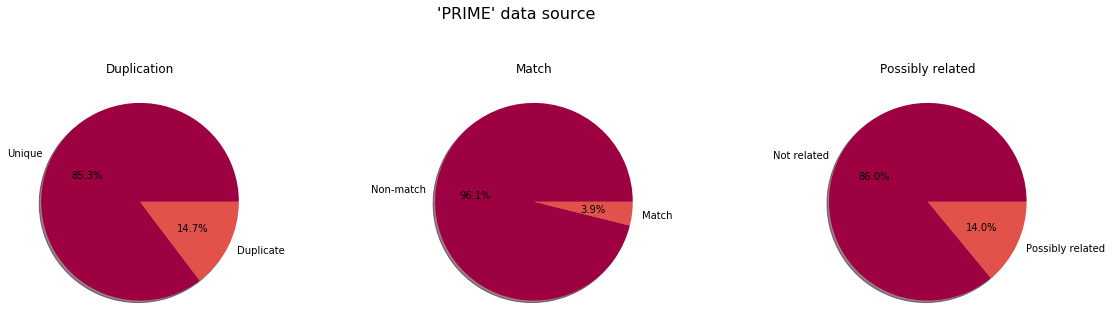

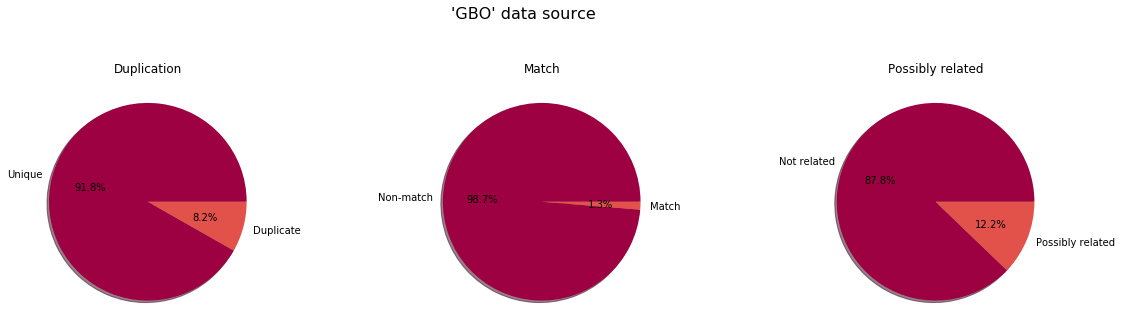

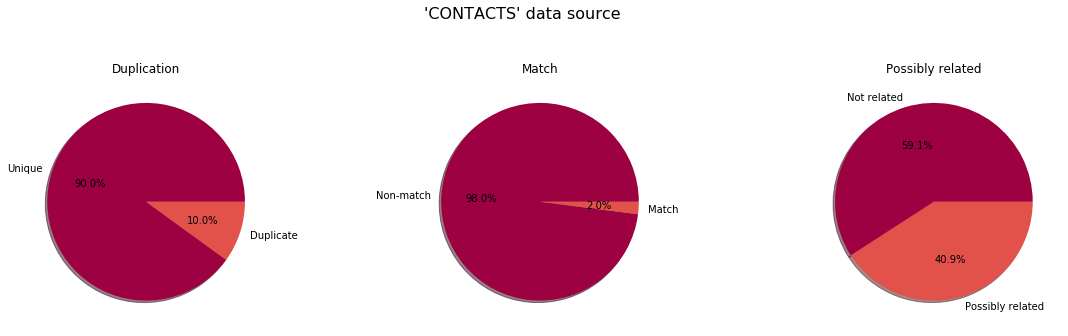

In [40]:
# Loop through "DATA_SOURCES".
data_sources = data.get("DATA_SOURCES", {})
for data_source_name, data_source in data_sources.items():

    # Pull data for data source, safely.
    record_count = data_source.get("RECORD_COUNT", 0)
    duplicate_count = data_source.get("DUPLICATE_COUNT", 0)
    possible_match_count = data_source.get("POSSIBLE_MATCH_COUNT", 0)
    possibly_related_count = data_source.get("POSSIBLY_RELATED_COUNT", 0)
    single_count = data_source.get("SINGLE_COUNT", 0)

    # Pie chart configuration.
    plt.figure(1, figsize=(20,10))
    the_grid = GridSpec(2, 3)
    cmap = plt.get_cmap('Spectral')
    colors = [cmap(i) for i in np.linspace(0, 1, 8)]

    # Create "Duplication" pie chart.
    plt.subplot(the_grid[0, 0], aspect=1, title='Duplication')
    counts=[record_count-duplicate_count, duplicate_count]
    labels=["Unique", "Duplicate"]
    plt.pie(counts, labels=labels, autopct='%1.1f%%', shadow=True, colors=colors)

    # Create "Match" pie chart.
    plt.subplot(the_grid[0, 1], aspect=1, title='Match')
    counts=[record_count-duplicate_count-possible_match_count, possible_match_count]
    labels=["Non-match", "Match"]
    plt.pie(counts, labels=labels, autopct='%1.1f%%', shadow=True, colors=colors)


    # Create "Possibly related" pie chart.
    plt.subplot(the_grid[0, 2], aspect=1, title='Possibly related')
    counts=[record_count-duplicate_count-possibly_related_count, possibly_related_count]
    labels=["Not related", "Possibly related"]
    plt.pie(counts, labels=labels, autopct='%1.1f%%', shadow=True, colors=colors)
    
    # Plot header
    plt.suptitle("'{0}' data source".format(data_source_name), fontsize=16)
    
    # Show the plot
    plt.show()
